In [21]:
import optuna
import seaborn as sns
import matplotlib.pyplot as plt
import re
import pandas as pd
from collections import defaultdict

# 1. Load the Optuna study from PostgreSQL
storage_url = "postgresql:///optuna_study"  # replace accordingly
study_name = "[May-11-09-05] 9 Organisms, Regular Objective"
study = optuna.load_study(study_name=study_name, storage=storage_url)

df = study.trials_dataframe(attrs=('number', 'value', 'params', 'state'))
max_val = df['value'].max()
df = df[df['value'] >= max_val]
df = df[df['state'] == 'COMPLETE'].sort_values('value', ascending=False)
params_df = df.filter(like='params_').copy()
params_df.index = [f"Trial {n}" for n in df['number']]

# Group by organism ID
organism_groups = {}
pattern = r"params_organism_(\d+)_(.+)"
for col in params_df.columns:
    match = re.match(pattern, col)
    if match:
        org_id = int(match.group(1))
        organism_groups.setdefault(org_id, []).append(col)

# Group by parameter name
param_groups = defaultdict(list)
pattern = r"params_organism_(\d+)_(.+)"
for col in params_df.columns:
    match = re.match(pattern, col)
    if match:
        param_name = match.group(2)
        param_groups[param_name].append(col)


📊 Parameter 'age_max' Across Organisms


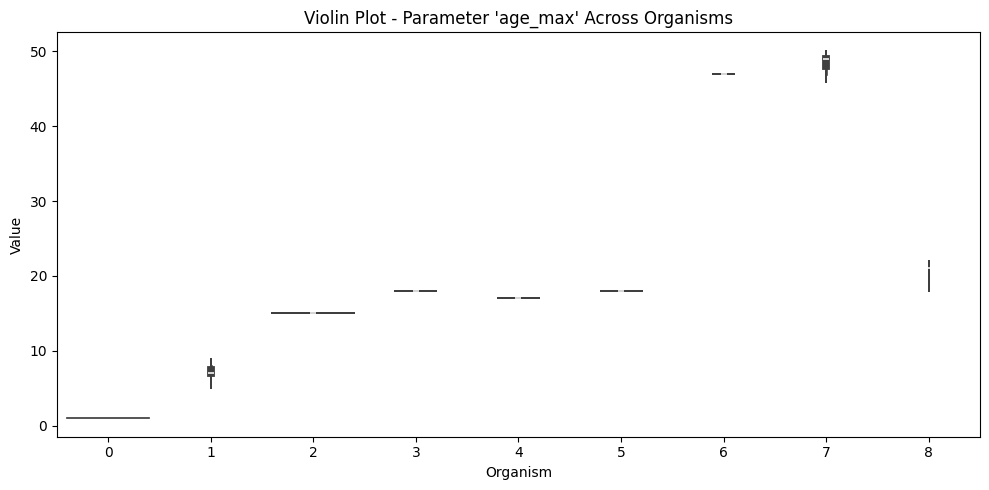

Mean per Organism: {'0': 1.0, '1': 7.142857142857143, '2': 15.0, '3': 18.0, '4': 17.0, '5': 18.0, '6': 47.0, '7': 48.42857142857143, '8': 20.714285714285715}
Median per Organism: {'0': 1.0, '1': 7.0, '2': 15.0, '3': 18.0, '4': 17.0, '5': 18.0, '6': 47.0, '7': 49.0, '8': 21.0}

📊 Parameter 'age_reproduction' Across Organisms


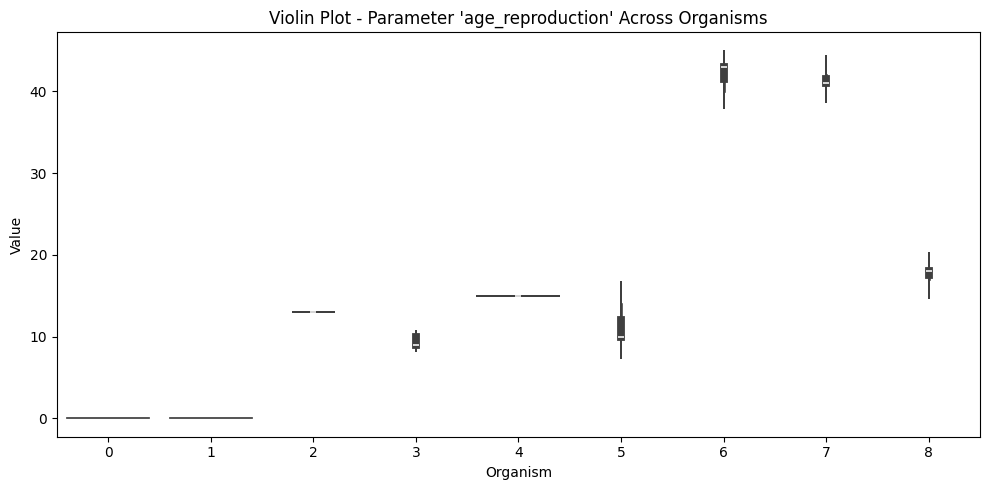

Mean per Organism: {'0': 0.0, '1': 0.0, '2': 13.0, '3': 9.428571428571429, '4': 15.0, '5': 11.142857142857142, '6': 42.142857142857146, '7': 41.285714285714285, '8': 17.714285714285715}
Median per Organism: {'0': 0.0, '1': 0.0, '2': 13.0, '3': 9.0, '4': 15.0, '5': 10.0, '6': 43.0, '7': 41.0, '8': 18.0}

📊 Parameter 'biomass_max' Across Organisms


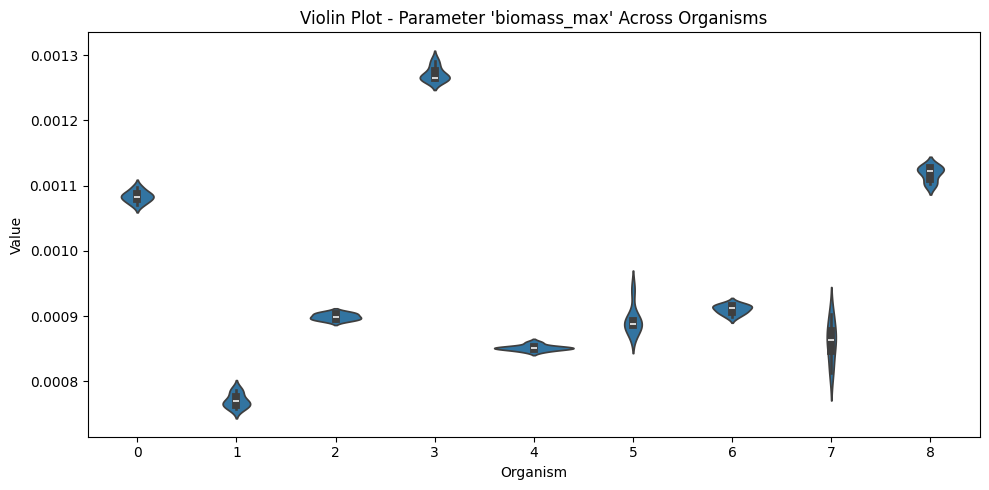

Mean per Organism: {'0': 0.001083480098965217, '1': 0.0007702538084573601, '2': 0.0008992121372596913, '3': 0.0012715100557442965, '4': 0.0008514537675665086, '5': 0.0008940070858580911, '6': 0.0009103651374825557, '7': 0.0008606912650428848, '8': 0.0011184194621261078}
Median per Organism: {'0': 0.0010826588860947037, '1': 0.0007690988728399044, '2': 0.0008988141418308065, '3': 0.0012659548146834526, '4': 0.0008508651948026625, '5': 0.0008880887415458843, '6': 0.0009119220741892389, '7': 0.000863081586721107, '8': 0.0011232090964807787}

📊 Parameter 'biomass_reproduction' Across Organisms


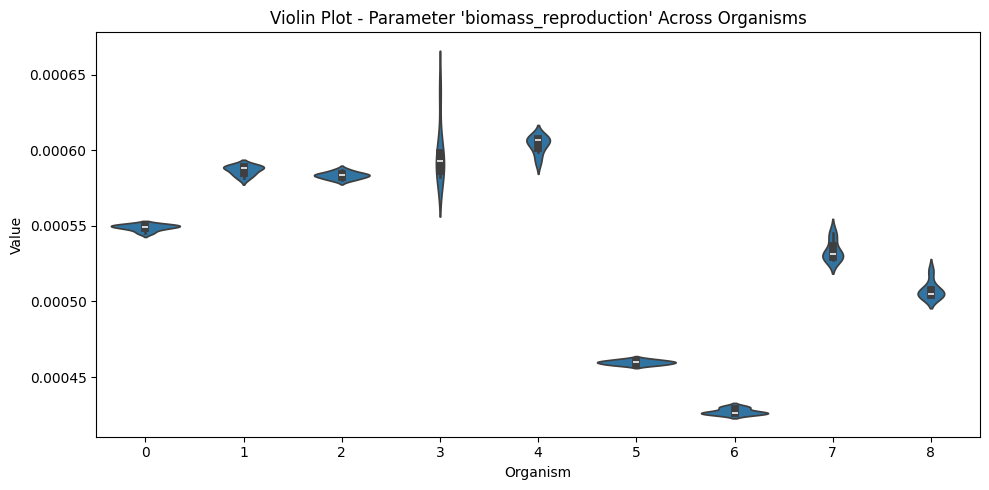

Mean per Organism: {'0': 0.0005490657428486808, '1': 0.0005868662190659745, '2': 0.0005835005351270492, '3': 0.0005977758502284207, '4': 0.0006036535075993326, '5': 0.0004597327822190344, '6': 0.00042723346529036966, '7': 0.0005338949347474893, '8': 0.0005075395169243097}
Median per Organism: {'0': 0.0005492515270678963, '1': 0.0005886135537395839, '2': 0.0005834871203953775, '3': 0.0005928091711287679, '4': 0.0006070543722088565, '5': 0.0004597322064339597, '6': 0.00042623728508475343, '7': 0.000531300068045894, '8': 0.000505260543055153}

📊 Parameter 'k' Across Organisms


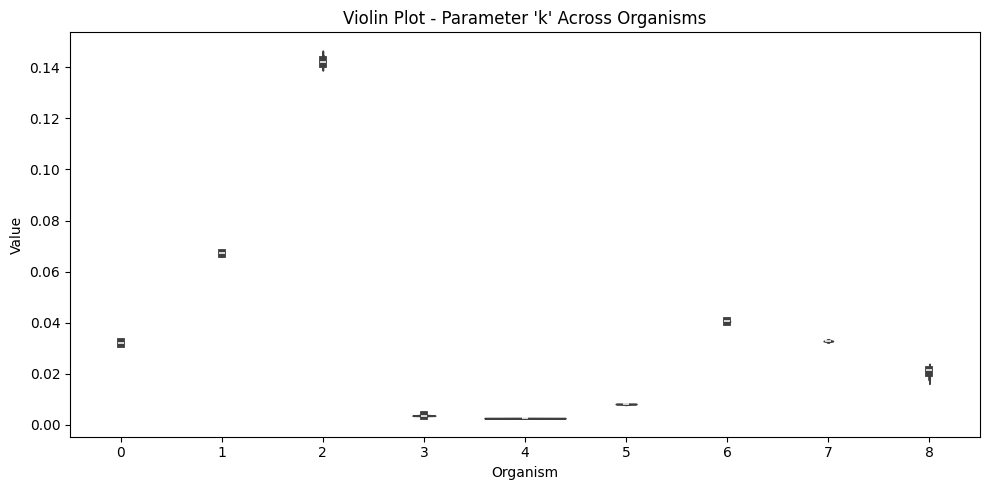

Mean per Organism: {'0': 0.03208477593232138, '1': 0.06709426834719576, '2': 0.1422514707496642, '3': 0.0036045747760624428, '4': 0.0025605823972138313, '5': 0.008079742245694261, '6': 0.04062401237475372, '7': 0.03284182198980783, '8': 0.02065300573941259}
Median per Organism: {'0': 0.03203944411158116, '1': 0.0671119545744362, '2': 0.142052805677394, '3': 0.0035614396079694335, '4': 0.002557884255714671, '5': 0.008108290433555019, '6': 0.04058265136483079, '7': 0.03277763822974259, '8': 0.021450295256126753}


In [ ]:
# Plot per-parameter visualizations
for param_name, cols in param_groups.items():
    print(f"\n📊 Parameter '{param_name}' Across Organisms")
    
    sub_df = params_df[cols].copy()
    sub_df['Trial'] = params_df.index

    # Melt for seaborn
    melted = sub_df.melt(id_vars='Trial', var_name='OrganismParam', value_name='Value')
    
    # Optional: rename for readability
    melted['Organism'] = melted['OrganismParam'].str.extract(r'organism_(\d+)').astype(int)
    
    # Violin plot
    plt.figure(figsize=(10, 5))
    sns.violinplot(x='Organism', y='Value', data=melted)
    plt.title(f"Violin Plot - Parameter '{param_name}' Across Organisms")
    plt.tight_layout()
    plt.show()

    # Summary stats
    means = sub_df[cols].astype(float).mean().to_dict()
    medians = sub_df[cols].astype(float).median().to_dict()
    print("Mean per Organism:", {k.split('_')[2]: v for k, v in means.items()})
    print("Median per Organism:", {k.split('_')[2]: v for k, v in medians.items()})


📊 Parameter 'age_max' Across Organisms


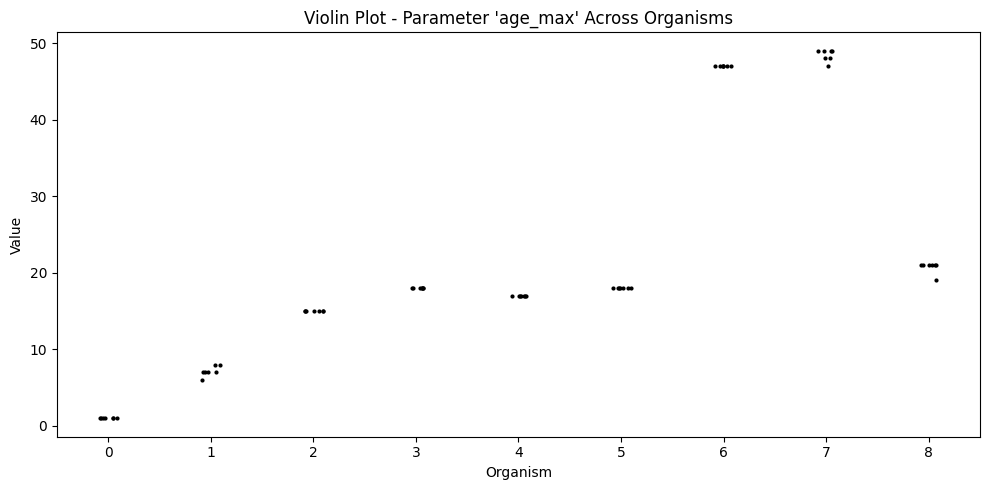

Mean per Organism: {'0': 1.0, '1': 7.142857142857143, '2': 15.0, '3': 18.0, '4': 17.0, '5': 18.0, '6': 47.0, '7': 48.42857142857143, '8': 20.714285714285715}
Median per Organism: {'0': 1.0, '1': 7.0, '2': 15.0, '3': 18.0, '4': 17.0, '5': 18.0, '6': 47.0, '7': 49.0, '8': 21.0}

📊 Parameter 'age_reproduction' Across Organisms


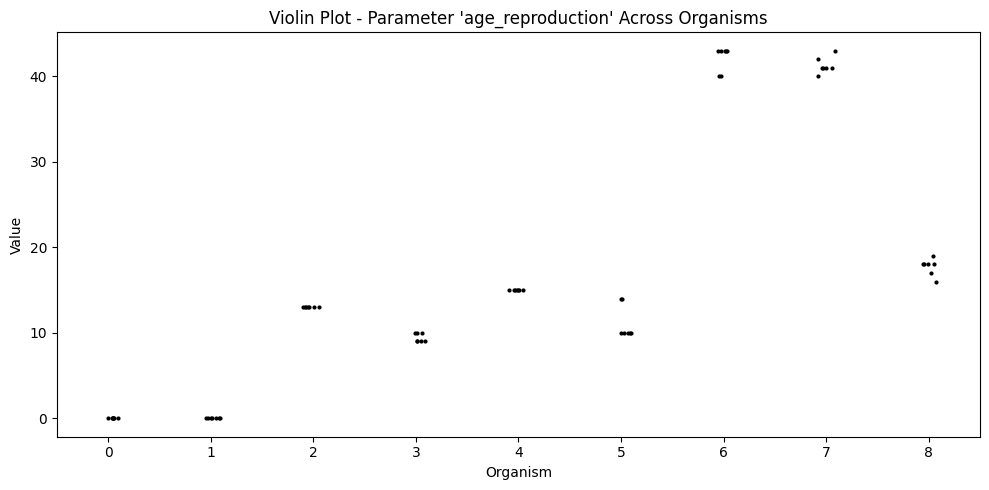

Mean per Organism: {'0': 0.0, '1': 0.0, '2': 13.0, '3': 9.428571428571429, '4': 15.0, '5': 11.142857142857142, '6': 42.142857142857146, '7': 41.285714285714285, '8': 17.714285714285715}
Median per Organism: {'0': 0.0, '1': 0.0, '2': 13.0, '3': 9.0, '4': 15.0, '5': 10.0, '6': 43.0, '7': 41.0, '8': 18.0}

📊 Parameter 'biomass_max' Across Organisms


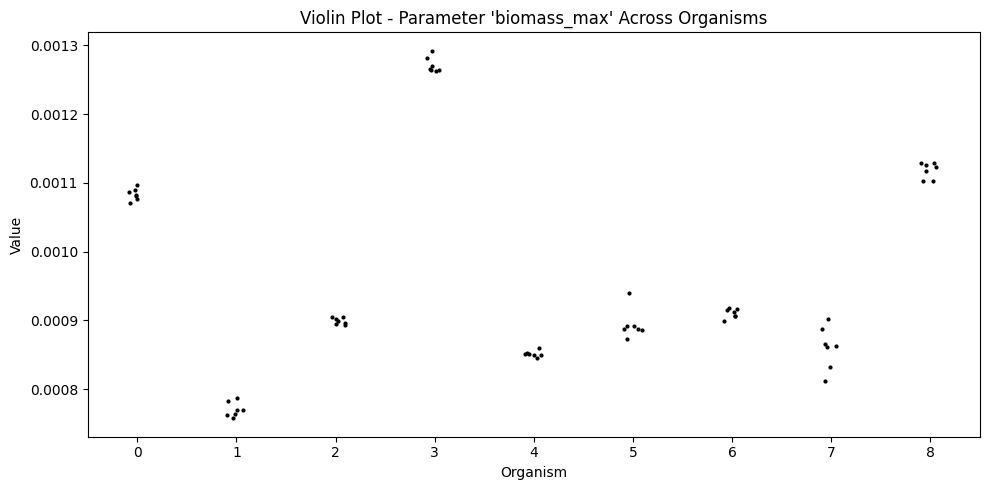

Mean per Organism: {'0': 0.001083480098965217, '1': 0.0007702538084573601, '2': 0.0008992121372596913, '3': 0.0012715100557442965, '4': 0.0008514537675665086, '5': 0.0008940070858580911, '6': 0.0009103651374825557, '7': 0.0008606912650428848, '8': 0.0011184194621261078}
Median per Organism: {'0': 0.0010826588860947037, '1': 0.0007690988728399044, '2': 0.0008988141418308065, '3': 0.0012659548146834526, '4': 0.0008508651948026625, '5': 0.0008880887415458843, '6': 0.0009119220741892389, '7': 0.000863081586721107, '8': 0.0011232090964807787}

📊 Parameter 'biomass_reproduction' Across Organisms


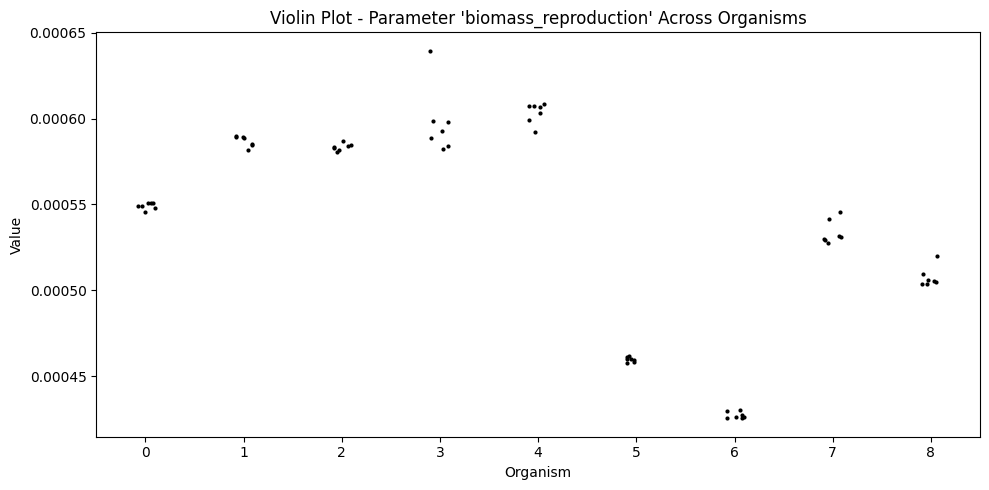

Mean per Organism: {'0': 0.0005490657428486808, '1': 0.0005868662190659745, '2': 0.0005835005351270492, '3': 0.0005977758502284207, '4': 0.0006036535075993326, '5': 0.0004597327822190344, '6': 0.00042723346529036966, '7': 0.0005338949347474893, '8': 0.0005075395169243097}
Median per Organism: {'0': 0.0005492515270678963, '1': 0.0005886135537395839, '2': 0.0005834871203953775, '3': 0.0005928091711287679, '4': 0.0006070543722088565, '5': 0.0004597322064339597, '6': 0.00042623728508475343, '7': 0.000531300068045894, '8': 0.000505260543055153}

📊 Parameter 'k' Across Organisms


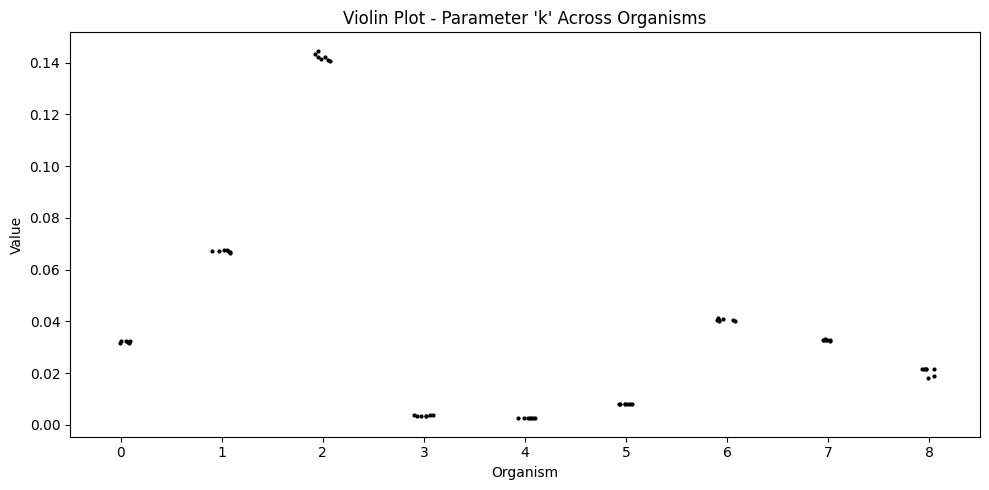

Mean per Organism: {'0': 0.03208477593232138, '1': 0.06709426834719576, '2': 0.1422514707496642, '3': 0.0036045747760624428, '4': 0.0025605823972138313, '5': 0.008079742245694261, '6': 0.04062401237475372, '7': 0.03284182198980783, '8': 0.02065300573941259}
Median per Organism: {'0': 0.03203944411158116, '1': 0.0671119545744362, '2': 0.142052805677394, '3': 0.0035614396079694335, '4': 0.002557884255714671, '5': 0.008108290433555019, '6': 0.04058265136483079, '7': 0.03277763822974259, '8': 0.021450295256126753}


In [23]:
# Plot per-parameter visualizations
for param_name, cols in param_groups.items():
    print(f"\n📊 Parameter '{param_name}' Across Organisms")
    
    sub_df = params_df[cols].copy()
    sub_df['Trial'] = params_df.index

    # Melt for seaborn
    melted = sub_df.melt(id_vars='Trial', var_name='OrganismParam', value_name='Value')
    
    # Optional: rename for readability
    melted['Organism'] = melted['OrganismParam'].str.extract(r'organism_(\d+)').astype(int)
    
    # Violin plot
    plt.figure(figsize=(10, 5))
    sns.stripplot(x='Organism', y='Value', data=melted, color='k', size=3, jitter=True)
    plt.title(f"Violin Plot - Parameter '{param_name}' Across Organisms")
    plt.tight_layout()
    plt.show()

    # Summary stats
    means = sub_df[cols].astype(float).mean().to_dict()
    medians = sub_df[cols].astype(float).median().to_dict()
    print("Mean per Organism:", {k.split('_')[2]: v for k, v in means.items()})
    print("Median per Organism:", {k.split('_')[2]: v for k, v in medians.items()})

In [24]:
final_params = []
for param_name, cols in param_groups.items():
    for col in cols:
        organism = int(re.search(r'organism_(\d+)', col).group(1))
        median_val = params_df[col].astype(float).median()
        final_params.append({
            "organism": organism,
            "parameter": param_name,
            "final_value": median_val
        })

final_params_df = pd.DataFrame(final_params).sort_values(['organism', 'parameter'])
display(final_params_df)

,organism,parameter,final_value
0,0,age_max,1.000000
9,0,age_reproduction,0.000000
18,0,biomass_max,0.001083
27,0,biomass_reproduction,0.000549
36,0,k,0.032039
1,1,age_max,7.000000
10,1,age_reproduction,0.000000
19,1,biomass_max,0.000769
28,1,biomass_reproduction,0.000589
37,1,k,0.067112


In [ ]:
variability = params_df.std().reset_index()
variability.columns = ['param', 'stddev']
variability['organism'] = variability['param'].str.extract(r'organism_(\d+)').astype(int)
variability['parameter'] = variability['param'].str.extract(r'organism_\d+_(.+)')
high_var = variability[variability['stddev'] > 0.005]  # Define your threshold
high_var